# Age Adjustment

Hans explained what age standarization Brookings used.

| $Group$  | $Age$    | $Actual$ $t_1$   | $Actual$   $t_2$ | $counterfactual$ |
|:--------:|---------|:---------------------:|:---------------------:|:----------------:|
|    $A$   | $16-24$ | $\frac{emp_{1,A}}{pop_{1,A}}$ | $\frac{emp_{2,A}}{pop_{2,A}}$ | $\frac{emp_{1,A}}{pop_{1,A}} * pop_{2,A}$ | 
|    $B$   | $25-34$ | $\frac{emp_{1,b}}{pop_{1,B}}$ | $\frac{emp_{2,B}}{pop_{2,B}}$ | $\frac{emp_{1,B}}{pop_{1,B}} * pop_{2,B}$ | 
|    $C$   | $35-44$ | $\frac{emp_{1,C}}{pop_{1,C}}$ | $\frac{emp_{2,C}}{pop_{2,C}}$ | $\frac{emp_{1,C}}{pop_{1,C}} * pop_{2,C}$ | 
|    $D$   | $45-54$ | $\frac{emp_{1,D}}{pop_{1,D}}$ | $\frac{emp_{2,D}}{pop_{2,D}}$ | $\frac{emp_{1,D}}{pop_{1,D}} * pop_{2,D}$ | 
|    $E$   | $55+$   | $\frac{emp_{1,E}}{pop_{1,E}}$ | $\frac{emp_{2,E}}{pop_{2,E}}$ | $\frac{emp_{1,E}}{pop_{1,E}} * pop_{2,E}$ | 

Variables: <br>
$pop$ = population <br>
$emp_{1,A}$ = employement-to-population rate at $time_1$ for group $A$

$t_1$ will be 2007, our year to compare to. 

***
__Set up__

In [1]:
import pandas as pd

***
We will start with one group to set up the model.

We'll use Bachelor's degree holders.

In [2]:
rates = pd.read_csv("../data/processed/bach_rate.csv", index_col = 0)
population = pd.read_csv("../data/processed/bach_pop.csv", index_col = 0)
employed = pd.read_csv("../data/processed/bach_employed.csv", index_col = 0)

In [3]:
actual_1 = rates['2007']

In [4]:
counterfactual = pd.DataFrame(index = population.index)

In [5]:
for col in population.columns:
    counterfactual[col] = (population[col] * actual_1)

In [6]:
weighted_counterfactual = (counterfactual * counterfactual.apply(lambda x: x/x.sum())).mean()
weighted_actual = (employed * employed.apply(lambda x: x/x.sum())).mean()
weighted_population = (population * population.apply(lambda x: x/x.sum())).mean()

In [7]:
data = (((weighted_actual - weighted_counterfactual) / weighted_population).round(4)*100).to_frame()

In [8]:
import altair as alt

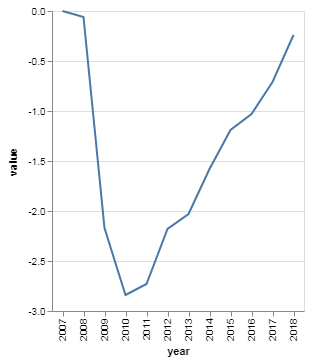

In [9]:
data.reset_index(inplace = True)
data.columns = ['year', 'value']

alt.Chart(data).mark_line().encode(
    x = alt.X('year:O'),
    y = alt.Y('value:Q'),
)

In [10]:
data_2 = pd.DataFrame()

data_2['actual'] = weighted_actual
data_2['counterfactual'] = weighted_counterfactual
data_2['population'] = weighted_population

data_2['actual_rate'] = data_2['actual'] / data_2['population']
data_2['counter_rate'] = data_2['counterfactual'] / data_2['population']

In [11]:
data_3 = data_2.reset_index().melt(id_vars='index', value_vars = ['actual_rate', 'counter_rate'])

data_3.columns = ['year', 'rates', 'value']

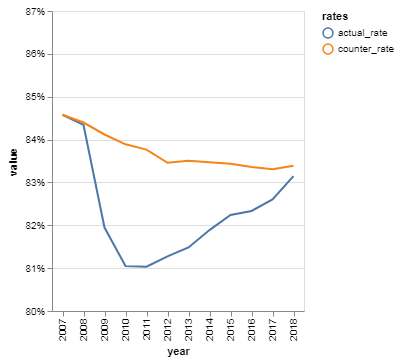

In [12]:
alt.Chart(data_3).mark_line().encode(
    x = alt.X('year:O'),
    y = alt.Y('value:Q', scale = alt.Scale(domain = [.80, .87]), axis = alt.Axis(format = '%')),
    color = alt.Color("rates:N")
)

In [13]:
gap = data_2.copy()
gap['gap'] = gap['actual_rate'] - gap['counter_rate']

gap = gap.reset_index().melt(id_vars='index', value_vars = 'gap')

gap.columns = ['year', 'gap', 'value']

In [20]:

gap.index

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object', name='year')

In [15]:
bach_chart = alt.Chart(gap).mark_line().encode(
    x = alt.X('year:O'),
    y = alt.Y('value:Q', axis = alt.Axis(format = '%')),
)

***
![brookings](https://i2.wp.com/www.brookings.edu/wp-content/uploads/2018/09/ES_THP_082818_JobsGap_Fig2.jpg?fit=1000%2C750px&ssl=1)

In [16]:
%run theme.py

In [17]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

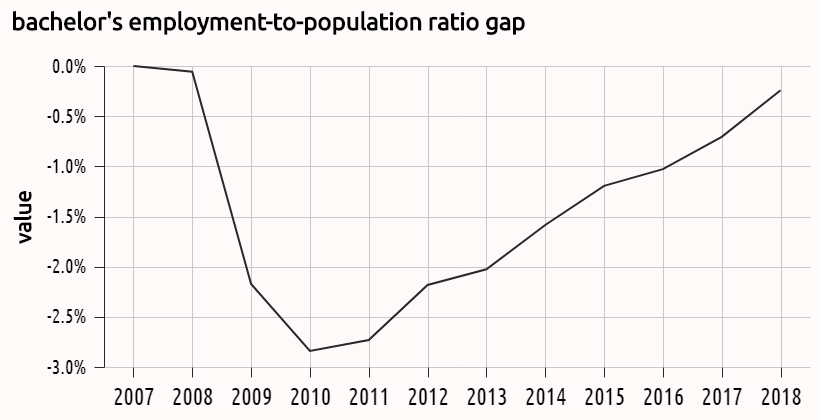

In [18]:
bach_chart.properties(height = 400, width = 800, title = "bachelor's employment-to-population ratio gap")